# 자동차 차종 분류 딥러닝 모델

In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### 이미지 경로 불러오기 ( 제조사 기준)

In [2]:
Image_path = "D:/DeepLearning/kcar_data/"
Brand_list = os.listdir(Image_path)

print ("Brand_list: {}".format(Brand_list))

Brand_list: ['GM대우', '기아', '르노삼성', '쌍용', '제네시스', '현대']


In [3]:
Brand_path =[]
for i in Brand_list:
    Brand_path.append(Image_path+str(i))
    print(i)

GM대우
기아
르노삼성
쌍용
제네시스
현대


In [4]:
Brand_path

['D:/DeepLearning/kcar_data/GM대우',
 'D:/DeepLearning/kcar_data/기아',
 'D:/DeepLearning/kcar_data/르노삼성',
 'D:/DeepLearning/kcar_data/쌍용',
 'D:/DeepLearning/kcar_data/제네시스',
 'D:/DeepLearning/kcar_data/현대']

### 모델 별 이미지 경로 담기

In [5]:
Car_path = []
for i in Brand_path:
    #print(os.listdir(i))
    Car_list = os.listdir(i)
    for j in Car_list:
        Car_path.append(i + "/" + j)

In [6]:
Car_path

['D:/DeepLearning/kcar_data/GM대우/알페온',
 'D:/DeepLearning/kcar_data/기아/K3',
 'D:/DeepLearning/kcar_data/기아/K5',
 'D:/DeepLearning/kcar_data/기아/K7',
 'D:/DeepLearning/kcar_data/기아/K9',
 'D:/DeepLearning/kcar_data/기아/니로',
 'D:/DeepLearning/kcar_data/기아/레이',
 'D:/DeepLearning/kcar_data/기아/모닝',
 'D:/DeepLearning/kcar_data/기아/모하비',
 'D:/DeepLearning/kcar_data/기아/스토닉',
 'D:/DeepLearning/kcar_data/기아/스팅어',
 'D:/DeepLearning/kcar_data/기아/스포티지',
 'D:/DeepLearning/kcar_data/기아/쏘렌토',
 'D:/DeepLearning/kcar_data/기아/쏘울',
 'D:/DeepLearning/kcar_data/기아/카니발',
 'D:/DeepLearning/kcar_data/기아/카렌스',
 'D:/DeepLearning/kcar_data/기아/포르테',
 'D:/DeepLearning/kcar_data/기아/프라이드',
 'D:/DeepLearning/kcar_data/르노삼성/QM3',
 'D:/DeepLearning/kcar_data/르노삼성/QM6',
 'D:/DeepLearning/kcar_data/르노삼성/SM3',
 'D:/DeepLearning/kcar_data/르노삼성/SM5',
 'D:/DeepLearning/kcar_data/르노삼성/SM6',
 'D:/DeepLearning/kcar_data/르노삼성/SM7',
 'D:/DeepLearning/kcar_data/르노삼성/클리오',
 'D:/DeepLearning/kcar_data/쌍용/렉스턴',
 'D:/DeepLearning/kcar_data/

### 세부 차급별 이미지 경로 담기

In [7]:
Model_path = []
for i in Car_path:
    Model_list = os.listdir(i)
    for j in Model_list:
        Model_path.append(i + "/" + j)

In [8]:
Model_path

['D:/DeepLearning/kcar_data/GM대우/알페온/알페온',
 'D:/DeepLearning/kcar_data/기아/K3/desktop.ini',
 'D:/DeepLearning/kcar_data/기아/K3/더뉴K3',
 'D:/DeepLearning/kcar_data/기아/K3/올뉴K3',
 'D:/DeepLearning/kcar_data/기아/K5/K5 2세대',
 'D:/DeepLearning/kcar_data/기아/K5/K5(JF)',
 'D:/DeepLearning/kcar_data/기아/K5/더뉴K5',
 'D:/DeepLearning/kcar_data/기아/K7/올 뉴 K7',
 'D:/DeepLearning/kcar_data/기아/K9/K9',
 'D:/DeepLearning/kcar_data/기아/니로/니로',
 'D:/DeepLearning/kcar_data/기아/레이/더 뉴 레이',
 'D:/DeepLearning/kcar_data/기아/레이/레이',
 'D:/DeepLearning/kcar_data/기아/모닝/더 뉴 모닝',
 'D:/DeepLearning/kcar_data/기아/모닝/올 뉴 모닝(JA)',
 'D:/DeepLearning/kcar_data/기아/모하비/더 뉴 모하비',
 'D:/DeepLearning/kcar_data/기아/스토닉/스토닉',
 'D:/DeepLearning/kcar_data/기아/스팅어/스팅어',
 'D:/DeepLearning/kcar_data/기아/스포티지/The SUV 스포티지',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지 R',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지 더볼드',
 'D:/DeepLearning/kcar_data/기아/쏘렌토/더 뉴 쏘렌토',
 'D:/DeepLearning/kcar_data/기아/쏘울/쏘울',
 'D:/DeepL

#### 불필요한 desktop.ini 경로 제거

In [9]:
Model_path.remove(Model_path[1])

In [10]:
Model_path

['D:/DeepLearning/kcar_data/GM대우/알페온/알페온',
 'D:/DeepLearning/kcar_data/기아/K3/더뉴K3',
 'D:/DeepLearning/kcar_data/기아/K3/올뉴K3',
 'D:/DeepLearning/kcar_data/기아/K5/K5 2세대',
 'D:/DeepLearning/kcar_data/기아/K5/K5(JF)',
 'D:/DeepLearning/kcar_data/기아/K5/더뉴K5',
 'D:/DeepLearning/kcar_data/기아/K7/올 뉴 K7',
 'D:/DeepLearning/kcar_data/기아/K9/K9',
 'D:/DeepLearning/kcar_data/기아/니로/니로',
 'D:/DeepLearning/kcar_data/기아/레이/더 뉴 레이',
 'D:/DeepLearning/kcar_data/기아/레이/레이',
 'D:/DeepLearning/kcar_data/기아/모닝/더 뉴 모닝',
 'D:/DeepLearning/kcar_data/기아/모닝/올 뉴 모닝(JA)',
 'D:/DeepLearning/kcar_data/기아/모하비/더 뉴 모하비',
 'D:/DeepLearning/kcar_data/기아/스토닉/스토닉',
 'D:/DeepLearning/kcar_data/기아/스팅어/스팅어',
 'D:/DeepLearning/kcar_data/기아/스포티지/The SUV 스포티지',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지 R',
 'D:/DeepLearning/kcar_data/기아/스포티지/스포티지 더볼드',
 'D:/DeepLearning/kcar_data/기아/쏘렌토/더 뉴 쏘렌토',
 'D:/DeepLearning/kcar_data/기아/쏘울/쏘울',
 'D:/DeepLearning/kcar_data/기아/카니발/올 뉴 카니발',
 'D:/DeepLear

In [11]:
len(Model_path)

74

### 차종별로 카데고리화 작업

In [12]:
Model_path[0].split('data')

['D:/DeepLearning/kcar_', '/GM대우/알페온/알페온']

In [13]:
Model_path[0].split("data")[1]

'/GM대우/알페온/알페온'

In [14]:
Model_list = []
for i in range(0, len(Model_path)):
    print(Model_path[i].split("data")[1])
    Model_list.append(Model_path[i].split("data")[1])

/GM대우/알페온/알페온
/기아/K3/더뉴K3
/기아/K3/올뉴K3
/기아/K5/K5 2세대
/기아/K5/K5(JF)
/기아/K5/더뉴K5
/기아/K7/올 뉴 K7
/기아/K9/K9
/기아/니로/니로
/기아/레이/더 뉴 레이
/기아/레이/레이
/기아/모닝/더 뉴 모닝
/기아/모닝/올 뉴 모닝(JA)
/기아/모하비/더 뉴 모하비
/기아/스토닉/스토닉
/기아/스팅어/스팅어
/기아/스포티지/The SUV 스포티지
/기아/스포티지/스포티지
/기아/스포티지/스포티지 R
/기아/스포티지/스포티지 더볼드
/기아/쏘렌토/더 뉴 쏘렌토
/기아/쏘울/쏘울
/기아/카니발/올 뉴 카니발
/기아/카니발/카니발R
/기아/카렌스/뉴카렌스
/기아/포르테/포르테
/기아/프라이드/더뉴프라이드
/르노삼성/QM3/QM3
/르노삼성/QM6/QM6
/르노삼성/SM3/SM3 네오
/르노삼성/SM3/뉴SM3
/르노삼성/SM3/뉴SM3(신형)
/르노삼성/SM5/SM5 노바
/르노삼성/SM6/SM6
/르노삼성/SM7/SM7 노바
/르노삼성/클리오/클리오
/쌍용/렉스턴/G4 렉스턴
/쌍용/코란도/코란도 C
/쌍용/코란도/코란도스포츠
/쌍용/코란도/코란도투리스모
/쌍용/티볼리/티볼리
/쌍용/티볼리/티볼리에어
/제네시스/G70/G70
/제네시스/G80/G80
/제네시스/G80/G80 스포츠
/제네시스/G90/G90
/현대/i30/i30
/현대/i30/i30(PD)
/현대/그랜저/그랜저 HG
/현대/그랜저/그랜저 IG
/현대/맥스크루즈/더 뉴 맥스크루즈
/현대/벨로스터/벨로스터(JS)
/현대/소나타/LF 소나타
/현대/소나타/LF 소나타 하이브리드
/현대/소나타/NF 소나타
/현대/소나타/YF 소나타
/현대/소나타/소나타 뉴 라이즈
/현대/스타렉스/그랜드 스타렉스
/현대/스타렉스/더뉴그랜드스타렉스
/현대/싼타페/싼타페 DM
/현대/싼타페/싼타페 TM
/현대/아반떼/더뉴아반떼AD
/현대/아반떼/아반떼AD
/현대/아반떼/아반떼MD
/현대/아반떼/아반떼XD
/현대/아이오닉/아이오닉 electric
/현대/아이오닉/아이

In [15]:
Model_list

['/GM대우/알페온/알페온',
 '/기아/K3/더뉴K3',
 '/기아/K3/올뉴K3',
 '/기아/K5/K5 2세대',
 '/기아/K5/K5(JF)',
 '/기아/K5/더뉴K5',
 '/기아/K7/올 뉴 K7',
 '/기아/K9/K9',
 '/기아/니로/니로',
 '/기아/레이/더 뉴 레이',
 '/기아/레이/레이',
 '/기아/모닝/더 뉴 모닝',
 '/기아/모닝/올 뉴 모닝(JA)',
 '/기아/모하비/더 뉴 모하비',
 '/기아/스토닉/스토닉',
 '/기아/스팅어/스팅어',
 '/기아/스포티지/The SUV 스포티지',
 '/기아/스포티지/스포티지',
 '/기아/스포티지/스포티지 R',
 '/기아/스포티지/스포티지 더볼드',
 '/기아/쏘렌토/더 뉴 쏘렌토',
 '/기아/쏘울/쏘울',
 '/기아/카니발/올 뉴 카니발',
 '/기아/카니발/카니발R',
 '/기아/카렌스/뉴카렌스',
 '/기아/포르테/포르테',
 '/기아/프라이드/더뉴프라이드',
 '/르노삼성/QM3/QM3',
 '/르노삼성/QM6/QM6',
 '/르노삼성/SM3/SM3 네오',
 '/르노삼성/SM3/뉴SM3',
 '/르노삼성/SM3/뉴SM3(신형)',
 '/르노삼성/SM5/SM5 노바',
 '/르노삼성/SM6/SM6',
 '/르노삼성/SM7/SM7 노바',
 '/르노삼성/클리오/클리오',
 '/쌍용/렉스턴/G4 렉스턴',
 '/쌍용/코란도/코란도 C',
 '/쌍용/코란도/코란도스포츠',
 '/쌍용/코란도/코란도투리스모',
 '/쌍용/티볼리/티볼리',
 '/쌍용/티볼리/티볼리에어',
 '/제네시스/G70/G70',
 '/제네시스/G80/G80',
 '/제네시스/G80/G80 스포츠',
 '/제네시스/G90/G90',
 '/현대/i30/i30',
 '/현대/i30/i30(PD)',
 '/현대/그랜저/그랜저 HG',
 '/현대/그랜저/그랜저 IG',
 '/현대/맥스크루즈/더 뉴 맥스크루즈',
 '/현대/벨로스터/벨로스터(JS)',
 '/현대/소나타/LF 소나타',
 '/현대/소나타/LF 소나타

### 데이터 부풀리기

   - 기존 차량 별 데이터의 양이 일정치 않고 부족하여 데이터 부풀리기를 실시하여야 한다.
   - icrawler 를 이용한 구글 이미지 크롤링 ( 장점 : 빠르고 쉽게 데이터를 늘릴 수 있다 / 단점 : 깨끗한 데이터가 들어오지 않을 확률이 크다)
   - ImageDataGenerator 를 이용한 데이터 부풀리기

In [16]:
# pip install icrawler

In [17]:
# from icrawler.builtin import GoogleImageCrawler

# caltech_dir = "C:/Users/1-11/Pictures/kcar_data"
# categories = Model_list

# for idx, cat in enumerate(categories):

#     image_dir = caltech_dir + cat
#     search_word = cat.split('/')[3]
#     print()
    
#     google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
#                                     storage={'root_dir': image_dir})

#     google_crawler.crawl(keyword=search_word, max_num=500,min_size=None, max_size=None)

In [18]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

caltech_dir = "C:/Users/1-11/Pictures/kcar_data"
categories = Model_list

for idx, cat in enumerate(categories):
    
    image_dir = caltech_dir + cat
    files = glob.glob(image_dir+"/*.jpg")
    
    img_num = len(files) # 처음 해당 디렉토리의 이미지 파일 갯수를 측정합니다.
    for i, f in enumerate(files):
        img = load_img(f)  
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  

        # 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
        # 지정된 폴더에 저장합니다.
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=image_dir, save_prefix='car', save_format='jpg'):
            i += 1
            if i > 5 :
                break # 이미지 5장을 생성하고 마칩니다
        img_num += 5 # 5장씩 새로 생성할 때마다 전체 이미지 갯수를 증가 시킵니다.
        print(img_num)
        if img_num > 3010 :
            break # 총 3010개가 넘어가면 해당 디렉토리에서는 데이터 부풀리기를 중단합니다.

Using TensorFlow backend.


4463
3811
3029
3189
3157
3019
3154
3145
3118
3119
3119
3153
3167
3114
3113
3132
3146
3136
3121
3136
3111
3136
3138
3105
3098
3112
3109
3088
3113
3121
3116
3101
3129
3126
3124
3122
3129
3125
3104
3140
3146
3138
3122
3173
3121
3126
3135
3135
3160
3130
3110
3110
3154
3115
3119
3138
3135
3137
3105
3122
3105
3139
3124
3114
3137
3122
3126
3122
3155
3154
3158
3128
3135
3103


### 이미지 데이터 변환
  - 64 by 64로 크기조정 및 각각의 이미지 파일은 RGB로 컨버팅하여 array 배열에 담는다

In [17]:
caltech_dir = "D:/DeepLearning/kcar_data"
categories = Model_list
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + cat
    files = glob.glob(image_dir+"/*.jpg")
    
    img_num = 0
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        
        data = np.asarray(img) / 255

        X.append(data)
        y.append(label)

        if i % 500 == 0:
            print(cat, " : ", f)
            
        img_num += 1
        if i >= 1500: break
    
    print(cat, " 파일 길이 : ", img_num)

X = np.array(X)
y = np.array(y)

# train data와 test data로 나눠줍니다
X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("keras_data.npy", xy)


print("전체 이미지 갯수 : ", len(X))

/GM대우/알페온/알페온  :  D:/DeepLearning/kcar_data/GM대우/알페온/알페온\000001.jpg
/GM대우/알페온/알페온  :  D:/DeepLearning/kcar_data/GM대우/알페온/알페온\car_0_2043.jpg
/GM대우/알페온/알페온  :  D:/DeepLearning/kcar_data/GM대우/알페온/알페온\car_0_3242.jpg
/GM대우/알페온/알페온  :  D:/DeepLearning/kcar_data/GM대우/알페온/알페온\car_0_4362.jpg
/GM대우/알페온/알페온  파일 길이 :  1501
/기아/K3/더뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/더뉴K3\car_0_0.jpg
/기아/K3/더뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/더뉴K3\car_0_2712.jpg
/기아/K3/더뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/더뉴K3\car_0_4470.jpg
/기아/K3/더뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/더뉴K3\car_0_6315.jpg
/기아/K3/더뉴K3  파일 길이 :  1501
/기아/K3/올뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/올뉴K3\car_0_0.jpg
/기아/K3/올뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/올뉴K3\car_0_2928.jpg
/기아/K3/올뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/올뉴K3\car_0_475.jpg
/기아/K3/올뉴K3  :  D:/DeepLearning/kcar_data/기아/K3/올뉴K3\car_0_66.jpg
/기아/K3/올뉴K3  파일 길이 :  1501
/기아/K5/K5 2세대  :  D:/DeepLearning/kcar_data/기아/K5/K5 2세대\car_0_100.jpg
/기아/K5/K5 2세대  :  D:/DeepLe

/기아/프라이드/더뉴프라이드  :  D:/DeepLearning/kcar_data/기아/프라이드/더뉴프라이드\car_0_2818.jpg
/기아/프라이드/더뉴프라이드  :  D:/DeepLearning/kcar_data/기아/프라이드/더뉴프라이드\car_0_4540.jpg
/기아/프라이드/더뉴프라이드  :  D:/DeepLearning/kcar_data/기아/프라이드/더뉴프라이드\car_0_6394.jpg
/기아/프라이드/더뉴프라이드  파일 길이 :  1501
/르노삼성/QM3/QM3  :  D:/DeepLearning/kcar_data/르노삼성/QM3/QM3\car_0_1001.jpg
/르노삼성/QM3/QM3  :  D:/DeepLearning/kcar_data/르노삼성/QM3/QM3\car_0_2786.jpg
/르노삼성/QM3/QM3  :  D:/DeepLearning/kcar_data/르노삼성/QM3/QM3\car_0_4510.jpg
/르노삼성/QM3/QM3  :  D:/DeepLearning/kcar_data/르노삼성/QM3/QM3\car_0_6194.jpg
/르노삼성/QM3/QM3  파일 길이 :  1501
/르노삼성/QM6/QM6  :  D:/DeepLearning/kcar_data/르노삼성/QM6/QM6\car_0_1004.jpg
/르노삼성/QM6/QM6  :  D:/DeepLearning/kcar_data/르노삼성/QM6/QM6\car_0_2834.jpg
/르노삼성/QM6/QM6  :  D:/DeepLearning/kcar_data/르노삼성/QM6/QM6\car_0_4573.jpg
/르노삼성/QM6/QM6  :  D:/DeepLearning/kcar_data/르노삼성/QM6/QM6\car_0_6513.jpg
/르노삼성/QM6/QM6  파일 길이 :  1501
/르노삼성/SM3/SM3 네오  :  D:/DeepLearning/kcar_data/르노삼성/SM3/SM3 네오\car_0_0.jpg
/르노삼성/SM3/SM3 네오  :  D:/DeepLear

/현대/벨로스터/벨로스터(JS)  :  D:/DeepLearning/kcar_data/현대/벨로스터/벨로스터(JS)\car_0_4641.jpg
/현대/벨로스터/벨로스터(JS)  :  D:/DeepLearning/kcar_data/현대/벨로스터/벨로스터(JS)\car_0_6510.jpg
/현대/벨로스터/벨로스터(JS)  파일 길이 :  1501
/현대/소나타/LF 소나타  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타\car_0_1008.jpg
/현대/소나타/LF 소나타  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타\car_0_460.jpg
/현대/소나타/LF 소나타  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타\car_0_8298.jpg
/현대/소나타/LF 소나타  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타\현대_소나타 LF_2015_15시대_H165_V0.JPG
/현대/소나타/LF 소나타  파일 길이 :  1501
/현대/소나타/LF 소나타 하이브리드  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타 하이브리드\car_0_1.jpg
/현대/소나타/LF 소나타 하이브리드  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타 하이브리드\car_0_2832.jpg
/현대/소나타/LF 소나타 하이브리드  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타 하이브리드\car_0_47.jpg
/현대/소나타/LF 소나타 하이브리드  :  D:/DeepLearning/kcar_data/현대/소나타/LF 소나타 하이브리드\car_0_6530.jpg
/현대/소나타/LF 소나타 하이브리드  파일 길이 :  1501
/현대/소나타/NF 소나타  :  D:/DeepLearning/kcar_data/현대/소나타/NF 소나타\car_0_1000.jpg
/현대/소나타/NF 소나타  

MemoryError: 

## CNN 이미지 분류
  - 자동차 모델 분류

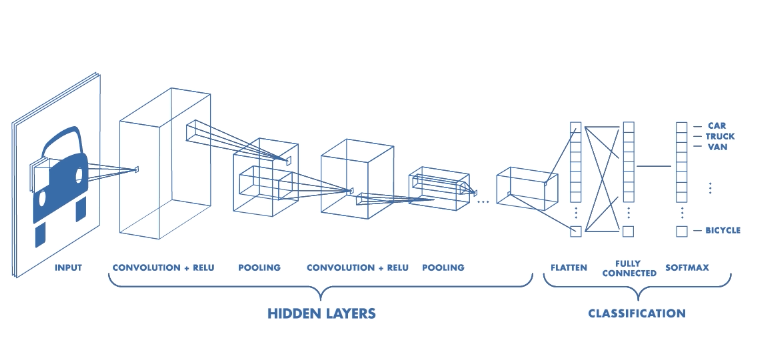

In [43]:
car_cnn = Image.open('C:/Users/1-11/Pictures/image_data/car_cnn.png')
car_cnn

In [25]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(41147, 64, 64, 3)
41147


In [26]:
categories = Model_list
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### 모델 학습 가용 디바이스 탐색

In [27]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4708409035196415315
]


### 기본 이미지 데이터 모델 학습

   - 첫번째 인자 : 컨볼루션 필터의 수 입니다.
   - 두번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
   - padding : 경계 처리 방법을 정의합니다.
        ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
        ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
   - input_shape : 샘플 수를 제외한 입력 형태를 정의 합니다. 모델에서 첫 레이어일 때만 정의하면 됩니다.
       (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
   - activation : 활성화 함수 설정합니다.
        ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
        ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
        ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
        ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

In [28]:
with K.tf_ops.device('/device:CPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32917 samples, validate on 8230 samples
Epoch 1/50




32917/32917 [==============================] - 112s 3ms/step - loss: 3.8811 - acc: 0.0624 - val_loss: 3.3374 - val_acc: 0.1264

Epoch 00001: val_loss improved from inf to 3.33737, saving model to ./model/multi_img_classification.model
Epoch 2/50
32917/32917 [==============================] - 111s 3ms/step - loss: 3.3079 - acc: 0.1242 - val_loss: 2.9781 - val_acc: 0.2109

Epoch 00002: val_loss improved from 3.33737 to 2.97809, saving model to ./model/multi_img_classification.model
Epoch 3/50
32917/32917 [==============================] - 111s 3ms/step - loss: 3.0291 - acc: 0.1683 - val_loss: 2.6639 - val_acc: 0.2646

Epoch 00003: val_loss improved from 2.97809 to 2.66393, saving model to ./model/multi_img_classification.model
Epoch 4/50
32917/32917 [==============================] - 110s 3ms/step - loss: 2.8035 - acc: 0.2067 - va

- 50번의 epochs를 주고 early_stopping 을 6번으로 제한을 두었을 때 22번째부터 val_loss가 더이상 증가하지 않았습니다

In [31]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

13716/13716 [==============================] - 9s 664us/step
정확도 : 0.5459


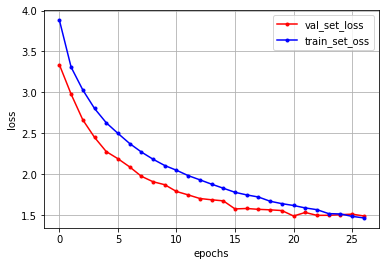

In [32]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### 데이터 부풀리기 후 재 학습모델

In [101]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, y_train, y_test = np.load('keras_data.npy')
print(X_train.shape)
print(X_train.shape[0])

(166555, 64, 64, 3)
166555


In [103]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
__________

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 133244 samples, validate on 33311 samples
Epoch 1/50
133240/133244 [============================>.] - ETA: 0s - loss: 2.9416 - acc: 0.1862

In [67]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

16886/16886 [==============================] - 13s 770us/step
정확도 : 0.5810


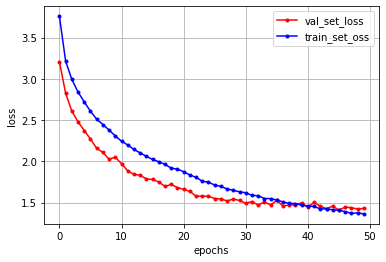

In [68]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [44]:
# 추가 할 작업

# 1. 데이터 부풀리기 완료
# 2. 재학습
# 3. 실제 test 데이터를 통한 정확도 확인
# 4. 출력한 결과를 토대로 중고차 사이트에 검색 연결